### Problem 1

Generate a set of points from an exponential distribution with some parameter $\lambda$. Derive the Maximum Likelihood estimator for the exponentian distribution, estimate the parameter and compare to the known true parameter.

$$\lambda_{MLE} = \frac{n}{\sum x_i}$$

In [1]:
import numpy as np

In [8]:
l = 20
for s in [100, 1000, 10000, 100000]:
    x = np.random.exponential(scale=1/l, size=s)
    l_est = s/x.sum()
    print(l_est, np.abs(l_est-l)/l*100)

19.896652322246016 0.5167383887699195
20.70260592181306 3.513029609065299
20.259097661426143 1.2954883071307144
19.994608130255717 0.02695934872141592


### Problem 2

Generate a second set of points from an exponential distribution with the parameter $\lambda_{true}+\delta$. Derive the Maximum Aposteriori estimate for the parameter of the distribution in Problem 1 assuming that the prior is normally distributed with $\mu = \lambda_{true}$ and $\sigma = \frac{\delta}{2}$. Calculate posterior probability of the second set of points.

$$\lambda_{\text{MAP}} = \frac{1}{2}\left(\lambda^{*} - \sigma^2\sum x_i + \sqrt{\left(\lambda^{*} - \sigma^2\sum x_i\right)^2+4n\sigma^2}\right)$$

In [9]:
l_true = 2
delta = 0.05
l = l_true + delta
sigma = delta/2

In [10]:
n = 1000
x_1 = np.random.exponential(scale=1/l_true, size=n)
x_2 = np.random.exponential(scale=1/l, size=n)

In [16]:
l_map = (l_true-sigma**2*x_2.sum() + np.sqrt((l_true-sigma**2*x_2.sum())**2 + 4*n*sigma**2))/2
print(l, l_map, n/x_2.sum())

2.05 2.0053211109706814 2.0401523419197165


### Problem 3

Select parameters for two non-collinear lines
$$y = a^{(i)}x + b^{(i)}$$
Generate 25 points on each line in the range $x \in [0; 10]$, add random gaussian noise with zero mean and std $\sigma = 0.5$ to each point. Plot to verify that task looks reasonable. Combine all generated points into one array and treat it as an input data.

Implement EM algorithm to estimate parameters of lines. Plot lines to visually verify goodness of fit (plotting lines and corresponding points in different color). Report average MSE for both lines.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

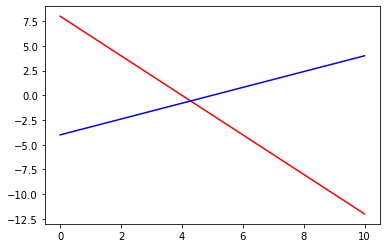

In [19]:
a = np.array([-2, 0.8])
b = np.array([8, -4])

x_base = np.linspace(0, 10, 100)
plt.plot(x_base, a[0]*x_base+b[0], 'r-')
plt.plot(x_base, a[1]*x_base+b[1], 'b-')
plt.show()

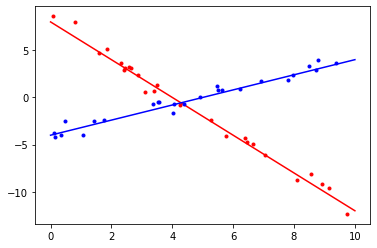

In [20]:
x0 = np.random.uniform(0, 10, size=25)
y0 = a[0]*x0 + b[0] + np.random.normal(0, 0.5, size=25)
x1 = np.random.uniform(0, 10, size=25)
y1 = a[1]*x1 + b[1] + np.random.normal(0, 0.5, size=25)
plt.plot(x_base, a[0]*x_base+b[0], 'r-')
plt.plot(x0, y0, 'r.')
plt.plot(x_base, a[1]*x_base+b[1], 'b-')
plt.plot(x1, y1, 'b.')
plt.show()

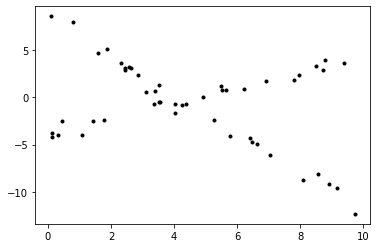

In [21]:
X = np.zeros((50, 2))
X[:25, 0] = x0
X[:25, 1] = y0
X[25:, 0] = x1
X[25:, 1] = y1

plt.plot(X[:,0], X[:,1], 'k.')
plt.show()

[-0.39367114 -0.76658966] [-0.02478991  5.15902384]


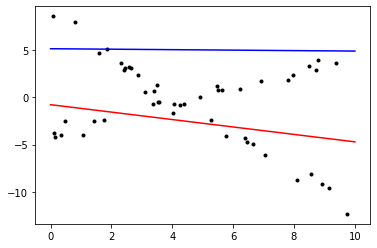

[-0.73113913  0.80474889] [-0.47948977  7.88701651]


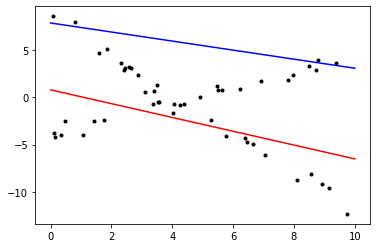

[-0.85694299  1.27053535] [-0.61161794  8.1613527 ]


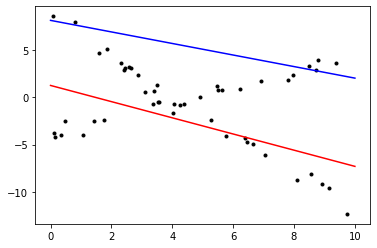

[-0.88511382  1.33259608] [-0.62012888  8.00871354]


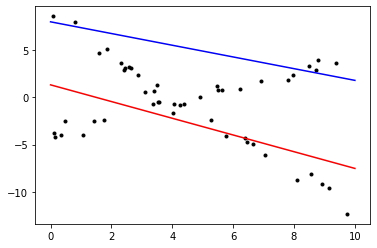

[-0.88804601  1.34749506] [-0.61715966  7.95657727]


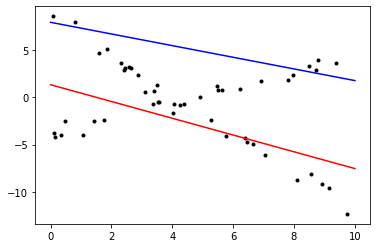

[-0.89065386  1.42708263] [-0.62494883  8.06554265]


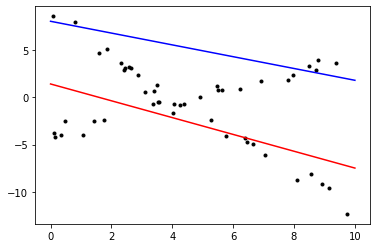

[-0.89912366  1.59798279] [-0.64708895  8.32570593]


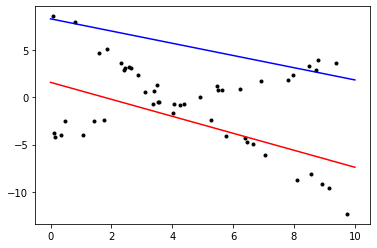

[-0.91301069  1.83996376] [-0.6768297  8.6423185]


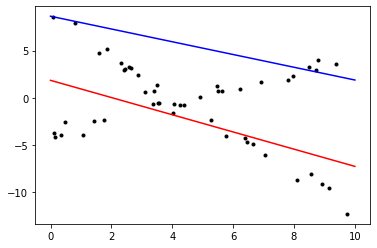

[-0.9290318  2.077633 ] [-0.69803964  8.86926859]


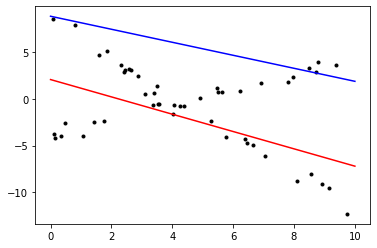

[-0.94056061  2.23689924] [-0.69029372  8.90571805]


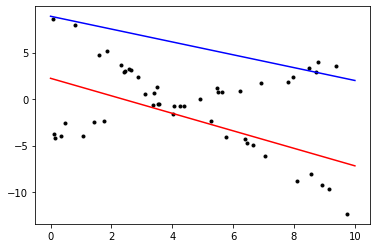

[-0.92848985  2.26923042] [-0.65959815  8.77258193]


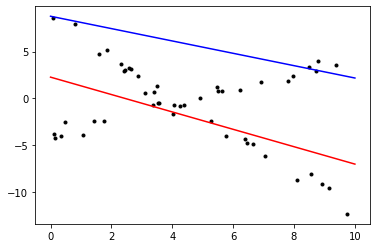

[-0.90485351  2.23777547] [-0.64095056  8.70380616]


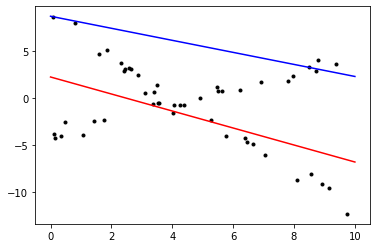

[-0.87798427  2.18221162] [-0.62104623  8.69886872]


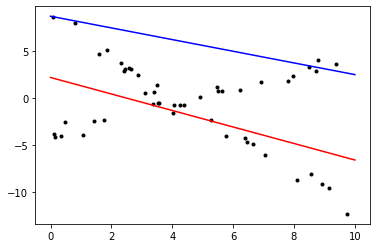

[-0.83169563  2.0734228 ] [-0.60862906  8.72601367]


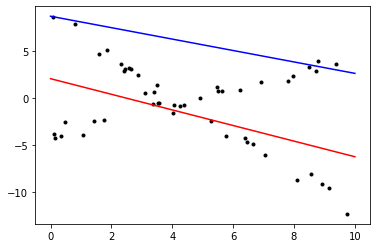

[-0.77983091  1.94690377] [-0.59121581  8.78063948]


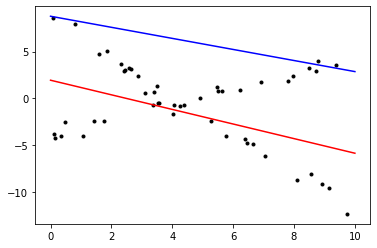

[-0.74375268  1.86088945] [-0.59848218  8.81700394]


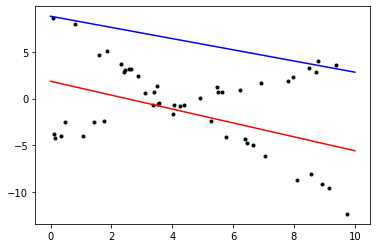

[-0.74036877  1.85763027] [-0.59715802  8.89813422]


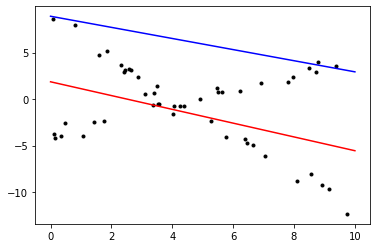

[-0.73581808  1.85577981] [-0.6008224   9.04494183]


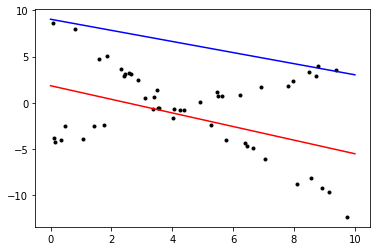

[-0.73161113  1.87256204] [-0.63089706  9.44917261]


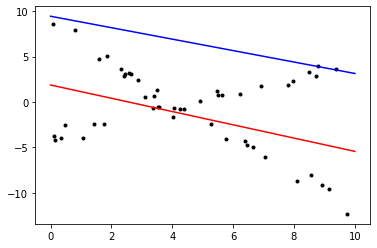

[-0.77527208  2.18113767] [-1.03287177 13.15535666]


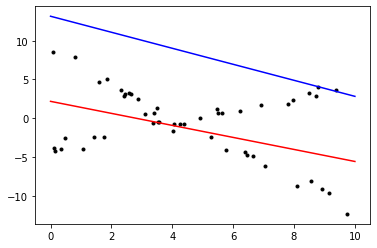

[-0.86423779  2.69581317] [-0.48986436  8.27461501]


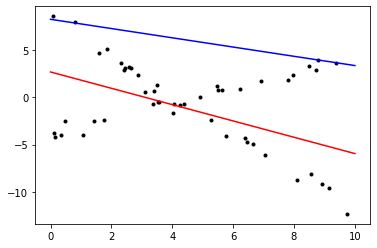

[-0.75207382  1.92076792] [-0.6451639   9.33042537]


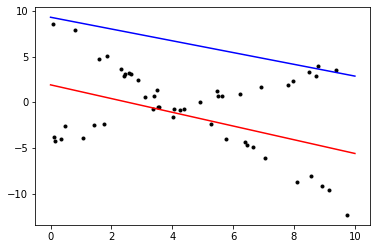

[-0.76858528  2.02312406] [-0.74776835 10.20132956]


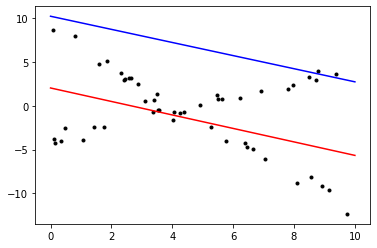

[-0.88804781  2.74775856] [-7.44892199 69.5906332 ]


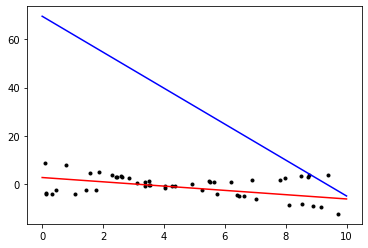

[-0.6129156   2.01760766] [-3227.98570185 28355.37232322]


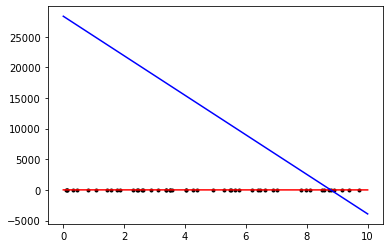

[-0.60966256  2.00905623] [0.5 0. ]


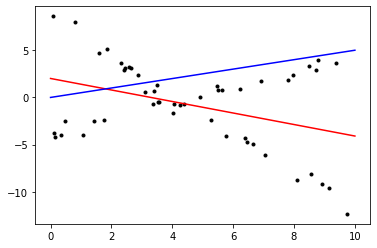

<ipython-input-29-997da793036f>:15: RuntimeWarning: invalid value encountered in double_scalars
  sigma2 = np.sum(delta2**2*w2)/np.sum(w2)


LinAlgError: Singular matrix

In [29]:
n = 50
sigma1, sigma2 = 1, 1
W1, W2 = np.eye(n)/2, np.eye(n)/2
theta1, theta2 = np.random.random(2), np.random.random(2)
theta1_old = theta1.copy()
theta2_old = theta2.copy()
for i in range(100):
    # E-step
    delta1 = np.abs(X[:,0]*theta1[0] + theta1[1] - X[:,1])
    delta2 = np.abs(X[:,0]*theta2[0] + theta2[1] - X[:,1])
    w1 = np.exp(-delta1**2/sigma1)/(np.exp(-delta1**2/sigma1) + np.exp(-delta2**2/sigma2))
    w2 = np.exp(-delta2**2/sigma2)/(np.exp(-delta1**2/sigma1) + np.exp(-delta2**2/sigma2))
    W1, W2 = np.diag(w1), np.diag(w2)
    sigma1 = np.sum(delta1**2*w1)/np.sum(w1)
    sigma2 = np.sum(delta2**2*w2)/np.sum(w2)

    # M-step
    A = np.ones((n, 2))
    A[:,0] = X[:,0]
    WA1, WA2 = W1@A, W2@A
    b1, b2 = WA1.T @ X[:,1], WA2.T @ X[:,1]
    theta1 = la.inv(WA1.T @ WA1) @ b1
    theta2 = la.inv(WA2.T @ WA2) @ b2
    print(theta1, theta2)

    plt.plot(X[:,0], X[:,1], 'k.')
    plt.plot(x_base, theta1[0]*x_base+theta1[1], 'r-')
    plt.plot(x_base, theta2[0]*x_base+theta2[1], 'b-')
    plt.show()
    
    if i > 0:
        if np.abs(theta1_old-theta1).sum() + np.abs(theta2_old-theta2).sum() < 0.01:
            break
    theta1_old = theta1.copy()
    theta2_old = theta2.copy()


### Problem 4

Generate 150 random 2D points from Mixture of Gaussians (select distinct centers and covariance matrices, and some mixing coefficients)
$$p(x) = \sum_{i=1}^{3}\pi_i\mathcal{N}(x; \mu_i, \Sigma_i)$$

Implement EM-algorithm to fit the model.

np.random.multivariate_normal